## MET CS677 Data Science with Python - Assignment 5
### Alan Szmyt
#### Built with Python 3.11.3

In [1]:
!python --version

Python 3.11.3


In [2]:
%%javascript
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        processEscapes: true
    },
    tex: {
        packages: {'[+]': ['require']},
    },
});

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from pandas import DataFrame
from IPython.display import Latex, Image
from assignment5 import (
    CTG_DATASET, ClassifierAnalyticsCollection, CtgColumns,
    DATAFRAME_NAME, DecisionTreeAnalytics, FetusStatus,
    NaiveBayesianAnalytics, RandomForestAnalytics, remap_nsp,
    RandomForestAnalyticsCollection, create_latex_table, data_directory
)

# Global Seaborn options.
sns.set_theme(font_scale=1.5, rc={"text.usetex": True})

In [4]:
# Cardiotocography dataset file from UCI.
dataset_xls: str = "CTG.xls"
ctg_dataset_file: Path = data_directory.joinpath(dataset_xls)

In [5]:
# noinspection PyTypeChecker
ctg_dataset: DataFrame = pd.read_excel(
    io=ctg_dataset_file,
    sheet_name="Raw Data",
    usecols=CtgColumns.INITIAL_COLS,
    skiprows=[1],
    skipfooter=3,
    na_values=["NaT"],
    engine="xlrd",
    dtype=CtgColumns.dtypes,
    converters={CtgColumns.COL_NSP: remap_nsp}
).astype({CtgColumns.COL_NSP: FetusStatus.dtype()})
ctg_dataset.attrs[DATAFRAME_NAME] = CTG_DATASET

In [6]:
ctg_dataset_table: str = create_latex_table(
    ctg_dataset.head(),
    label="tab:cardiotocography_datatable",
    caption="Cardiotocography Dataset"
)
Latex(ctg_dataset_table)

<IPython.core.display.Latex object>

In [7]:
# Train naive bayesian model, make predictions, and gather analytics.
naive_bayesian_analytics: NaiveBayesianAnalytics = NaiveBayesianAnalytics(
    dataset=ctg_dataset,
    predictor_col=CtgColumns.COL_NSP,
)

In [8]:
# Compute the accuracy.
print(f"Naive Bayesian accuracy: {naive_bayesian_analytics.accuracy.score}")

Naive Bayesian accuracy: 73.94%


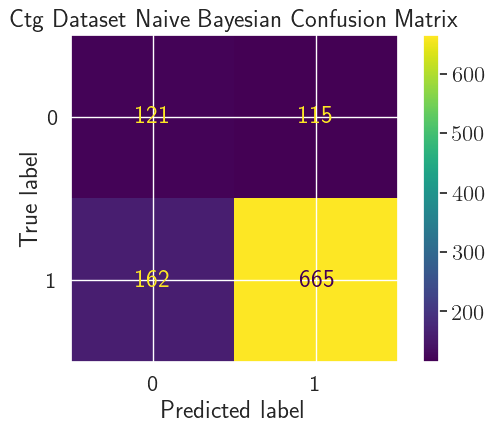

In [9]:
# Compute the confusion matrix.
naive_bayesian_analytics.show_confusion_matrix()

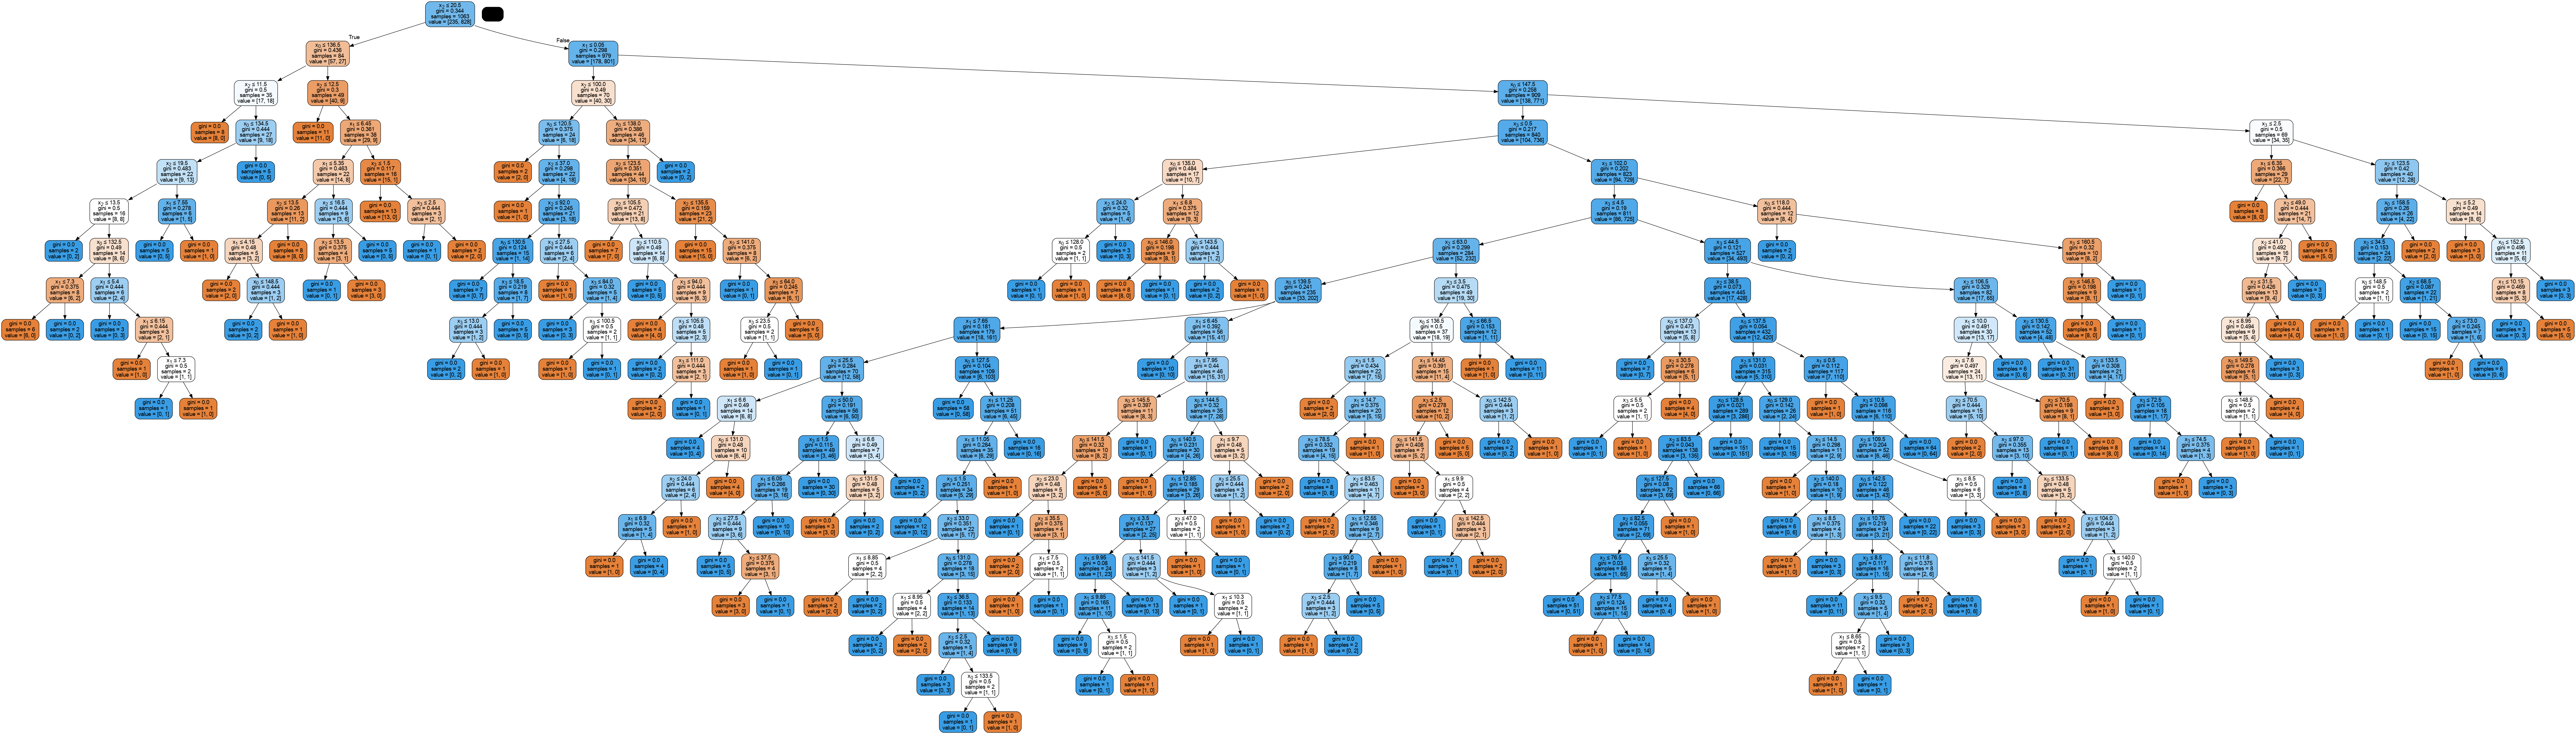

In [10]:
# Train decision tree model, make predictions, and gather analytics.
decision_tree_analytics: DecisionTreeAnalytics = DecisionTreeAnalytics(
    dataset=ctg_dataset,
    predictor_col=CtgColumns.COL_NSP,
)
decision_graph: tuple[Path, Path] = decision_tree_analytics.export()
Image(decision_graph[1])

In [11]:
# Compute the accuracy.
print(f"Decision Tree accuracy: {decision_tree_analytics.accuracy.score}")

Decision Tree accuracy: 81.28%


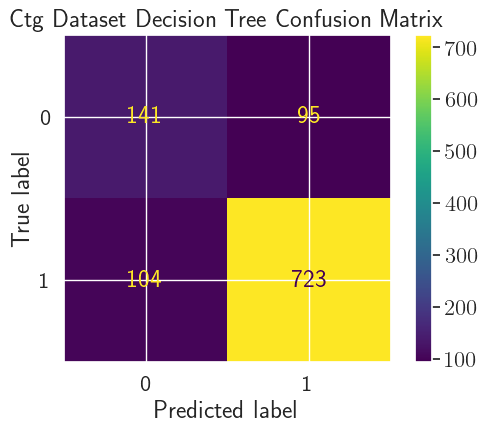

In [12]:
# Compute the confusion matrix.
decision_tree_analytics.show_confusion_matrix()

In [13]:
# Train random forest model, make predictions, and gather analytics.
random_forest_analytics: RandomForestAnalyticsCollection = \
    RandomForestAnalyticsCollection(
        analytics=[
            RandomForestAnalytics(
                dataset=ctg_dataset,
                predictor_col=CtgColumns.COL_NSP,
                persistence=True,
                trees=n,
                max_depth=d
            )
            for n in range(1, 11)
            for d in range(1, 6)
        ]
    )

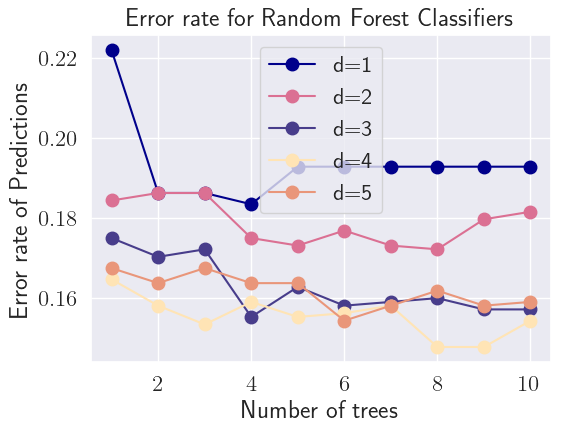

In [14]:
# Error plot for all random forest classifiers.
random_forest_analytics.show_error_plot()

In [15]:
# Get the random forest with the lowest error rate.
lowest_error_rf: RandomForestAnalytics = \
    random_forest_analytics.lowest_error
print(
    f"Best combination of N and d is: "
    f"N={lowest_error_rf.trees}, "
    f"d={lowest_error_rf.max_depth}"
)

Best combination of N and d is: N=8, d=4


In [16]:
print(
    f"The accuracy for best random forest is:"
    f" {lowest_error_rf.accuracy_score}"
)

The accuracy for best random forest is: 85.23%


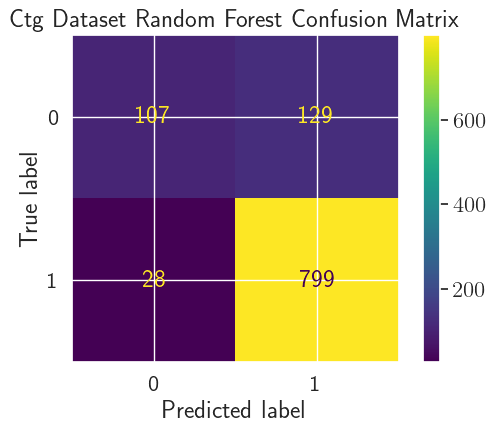

In [17]:
# Compute the confusion matrix.
lowest_error_rf.show_confusion_matrix()

In [18]:
# Gather analytics for all classifier models.
classifier_analytics = ClassifierAnalyticsCollection(
    analytics=[
        naive_bayesian_analytics,
        decision_tree_analytics,
        lowest_error_rf
    ]
)

In [19]:
# Generate the summary table from the analytics.
summary_table_df: DataFrame = classifier_analytics.summary_table
summary_table_df.attrs[DATAFRAME_NAME] = "Classifier Summary Table"

In [20]:
summary_table: str = create_latex_table(
    summary_table_df,
    label="tab:classifier_summary",
    caption="Classifier Summary"
)
Latex(summary_table)

<IPython.core.display.Latex object>